In [1]:
import numpy as np 
import pandas as pd 

from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 

from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
import os 

In [3]:
os.listdir() 

['.ipynb_checkpoints',
 'basics.ipynb',
 'spam.csv',
 'spam.ipynb',
 'Telco-Customer-Churn.csv',
 'telco_rfc.pkl']

In [4]:
df = pd.read_csv("spam.csv") 

In [6]:
X, y = df['EmailText'], df['Label']

In [7]:
cv = CountVectorizer() 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)  

In [11]:
X_train.shape, y_train.shape 

((4457,), (4457,))

In [12]:
X_test.shape, y_test.shape 

((1115,), (1115,))

In [13]:
X_train = cv.fit_transform(X_train) 
X_test = cv.transform(X_test) 

In [17]:
classifier = SVC(kernel = 'rbf') 

In [18]:
classifier.fit(X_train, y_train)  

SVC()

In [20]:
y_pred = classifier.predict(X_test)  

In [21]:
comparision_df = pd.DataFrame({'acutal':y_test, 'predicted':y_pred})  

In [22]:
comparision_df 

,acutal,predicted
3444,ham,ham
378,ham,ham
3330,ham,ham
4606,ham,ham
2050,ham,ham
...,...,...
5464,ham,ham
3134,ham,ham
1666,ham,ham
144,ham,ham


In [26]:
print(f"Accuracy Score: {accuracy_score(y_pred, y_test):.2f} ")     

Accuracy Score: 0.97 


In [28]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}") 

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       953
        spam       0.99      0.83      0.90       162

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [31]:
n = pd.value_counts(df['Label'], sort = True)   

C:\Users\Stark\AppData\Local\Temp\ipykernel_12528\3761907504.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  n = pd.value_counts(df['Label'], sort = True)


<Axes: ylabel='Label'>

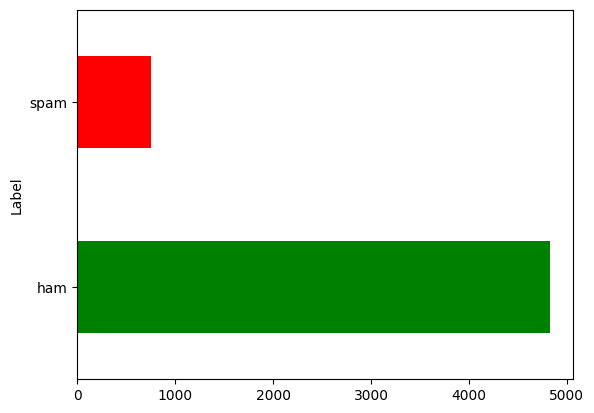

In [36]:
n.plot(kind = 'barh', color = ['green', 'red']) 

In [38]:
corr = confusion_matrix(y_test, y_pred) 

<Axes: >

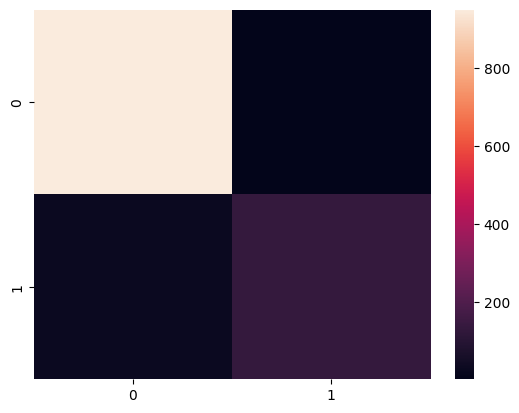

In [40]:
sns.heatmap(corr) 